In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: UL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


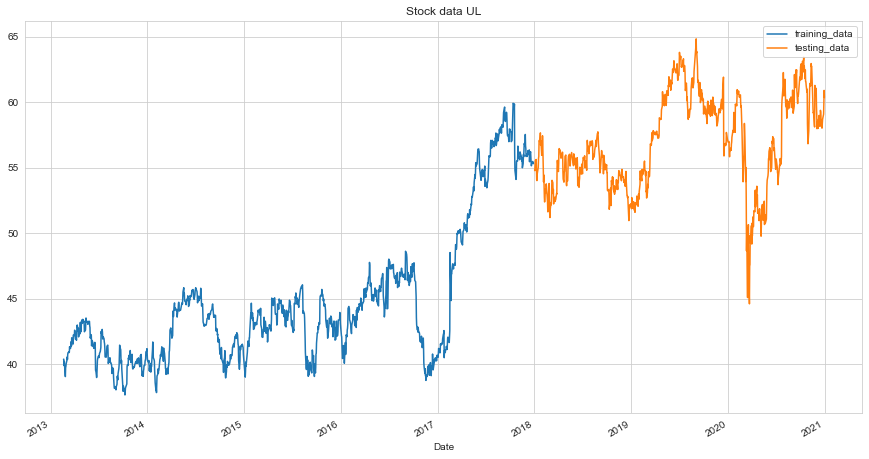

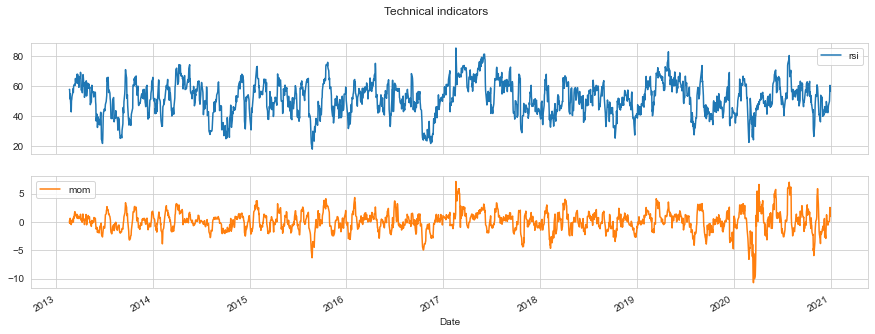

In [11]:
stock_name = 'ul'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1197.46, duration: 0:00:00.195038
episode: 2/2000, episode end value: 1159.64, duration: 0:00:00.193042
episode: 3/2000, episode end value: 1186.21, duration: 0:00:00.218062
episode: 4/2000, episode end value: 1252.96, duration: 0:00:00.169036
episode: 5/2000, episode end value: 1195.86, duration: 0:00:00.167028
episode: 6/2000, episode end value: 1180.24, duration: 0:00:00.159045
episode: 7/2000, episode end value: 1169.41, duration: 0:00:00.185047
episode: 8/2000, episode end value: 1159.34, duration: 0:00:00.180040
episode: 9/2000, episode end value: 1161.84, duration: 0:00:00.192023
episode: 10/2000, episode end value: 1143.94, duration: 0:00:00.185041
episode: 11/2000, episode end value: 1156.34, duration: 0:00:00.198043
episode: 12/2000, episode end value: 1175.00, duration: 0:00:00.195057
episode: 13/2000, episode end value: 1188.47, duration: 0:00:00.176032
episode: 14/2000, episode end value: 1131.62, duration: 0:00:00.176027
episode: 15/200

episode: 118/2000, episode end value: 1131.04, duration: 0:00:00.187048
episode: 119/2000, episode end value: 1147.29, duration: 0:00:00.185048
episode: 120/2000, episode end value: 1130.58, duration: 0:00:00.193043
episode: 121/2000, episode end value: 1145.36, duration: 0:00:00.198044
episode: 122/2000, episode end value: 1151.74, duration: 0:00:00.198032
episode: 123/2000, episode end value: 1134.62, duration: 0:00:00.202051
episode: 124/2000, episode end value: 1142.87, duration: 0:00:00.212043
episode: 125/2000, episode end value: 1143.00, duration: 0:00:00.200036
episode: 126/2000, episode end value: 1159.34, duration: 0:00:00.206052
episode: 127/2000, episode end value: 1145.84, duration: 0:00:00.197045
episode: 128/2000, episode end value: 1165.19, duration: 0:00:00.204033
episode: 129/2000, episode end value: 1132.79, duration: 0:00:00.201044
episode: 130/2000, episode end value: 1141.87, duration: 0:00:00.197065
episode: 131/2000, episode end value: 1143.02, duration: 0:00:00

episode: 232/2000, episode end value: 1140.38, duration: 0:00:00.228051
episode: 233/2000, episode end value: 1133.98, duration: 0:00:00.222039
episode: 234/2000, episode end value: 1144.45, duration: 0:00:00.204045
episode: 235/2000, episode end value: 1128.44, duration: 0:00:00.202061
episode: 236/2000, episode end value: 1129.34, duration: 0:00:00.214056
episode: 237/2000, episode end value: 1125.93, duration: 0:00:00.219035
episode: 238/2000, episode end value: 1146.50, duration: 0:00:00.191061
episode: 239/2000, episode end value: 1138.63, duration: 0:00:00.212030
episode: 240/2000, episode end value: 1140.12, duration: 0:00:00.216044
episode: 241/2000, episode end value: 1140.40, duration: 0:00:00.225042
episode: 242/2000, episode end value: 1137.89, duration: 0:00:00.221040
episode: 243/2000, episode end value: 1137.29, duration: 0:00:00.199056
episode: 244/2000, episode end value: 1134.26, duration: 0:00:00.208047
episode: 245/2000, episode end value: 1136.53, duration: 0:00:00

episode: 346/2000, episode end value: 1134.49, duration: 0:00:00.208047
episode: 347/2000, episode end value: 1126.30, duration: 0:00:00.204054
episode: 348/2000, episode end value: 1143.06, duration: 0:00:00.209046
episode: 349/2000, episode end value: 1122.01, duration: 0:00:00.205032
episode: 350/2000, episode end value: 1128.36, duration: 0:00:00.210048
episode: 351/2000, episode end value: 1164.68, duration: 0:00:00.216063
episode: 352/2000, episode end value: 1129.97, duration: 0:00:00.210030
episode: 353/2000, episode end value: 1151.25, duration: 0:00:00.192057
episode: 354/2000, episode end value: 1163.91, duration: 0:00:00.205046
episode: 355/2000, episode end value: 1134.18, duration: 0:00:00.190037
episode: 356/2000, episode end value: 1128.80, duration: 0:00:00.212050
episode: 357/2000, episode end value: 1128.81, duration: 0:00:00.217061
episode: 358/2000, episode end value: 1126.86, duration: 0:00:00.199028
episode: 359/2000, episode end value: 1135.28, duration: 0:00:00

episode: 461/2000, episode end value: 1185.84, duration: 0:00:00.218050
episode: 462/2000, episode end value: 1130.53, duration: 0:00:00.187042
episode: 463/2000, episode end value: 1150.96, duration: 0:00:00.190043
episode: 464/2000, episode end value: 1146.02, duration: 0:00:00.218048
episode: 465/2000, episode end value: 1148.50, duration: 0:00:00.219051
episode: 466/2000, episode end value: 1159.61, duration: 0:00:00.213046
episode: 467/2000, episode end value: 1146.01, duration: 0:00:00.204047
episode: 468/2000, episode end value: 1145.10, duration: 0:00:00.219050
episode: 469/2000, episode end value: 1155.99, duration: 0:00:00.212047
episode: 470/2000, episode end value: 1155.71, duration: 0:00:00.206047
episode: 471/2000, episode end value: 1162.57, duration: 0:00:00.230059
episode: 472/2000, episode end value: 1150.99, duration: 0:00:00.229051
episode: 473/2000, episode end value: 1133.00, duration: 0:00:00.223050
episode: 474/2000, episode end value: 1150.51, duration: 0:00:00

episode: 576/2000, episode end value: 1146.99, duration: 0:00:00.213047
episode: 577/2000, episode end value: 1149.80, duration: 0:00:00.215063
episode: 578/2000, episode end value: 1139.33, duration: 0:00:00.229045
episode: 579/2000, episode end value: 1132.63, duration: 0:00:00.208047
episode: 580/2000, episode end value: 1133.46, duration: 0:00:00.218035
episode: 581/2000, episode end value: 1153.34, duration: 0:00:00.214040
episode: 582/2000, episode end value: 1150.68, duration: 0:00:00.217048
episode: 583/2000, episode end value: 1149.30, duration: 0:00:00.186057
episode: 584/2000, episode end value: 1162.53, duration: 0:00:00.205039
episode: 585/2000, episode end value: 1176.57, duration: 0:00:00.225037
episode: 586/2000, episode end value: 1160.58, duration: 0:00:00.200053
episode: 587/2000, episode end value: 1156.79, duration: 0:00:00.219042
episode: 588/2000, episode end value: 1155.72, duration: 0:00:00.203062
episode: 589/2000, episode end value: 1154.34, duration: 0:00:00

episode: 691/2000, episode end value: 1135.95, duration: 0:00:00.212061
episode: 692/2000, episode end value: 1144.59, duration: 0:00:00.209045
episode: 693/2000, episode end value: 1141.05, duration: 0:00:00.224051
episode: 694/2000, episode end value: 1173.70, duration: 0:00:00.210047
episode: 695/2000, episode end value: 1122.63, duration: 0:00:00.224035
episode: 696/2000, episode end value: 1136.12, duration: 0:00:00.216050
episode: 697/2000, episode end value: 1130.81, duration: 0:00:00.226050
episode: 698/2000, episode end value: 1143.65, duration: 0:00:00.208060
episode: 699/2000, episode end value: 1126.27, duration: 0:00:00.236043
episode: 700/2000, episode end value: 1144.35, duration: 0:00:00.202043
episode: 701/2000, episode end value: 1163.74, duration: 0:00:00.220065
episode: 702/2000, episode end value: 1141.34, duration: 0:00:00.213042
episode: 703/2000, episode end value: 1140.81, duration: 0:00:00.205030
episode: 704/2000, episode end value: 1151.48, duration: 0:00:00

episode: 805/2000, episode end value: 1143.45, duration: 0:00:00.200062
episode: 806/2000, episode end value: 1157.06, duration: 0:00:00.215031
episode: 807/2000, episode end value: 1142.68, duration: 0:00:00.224049
episode: 808/2000, episode end value: 1175.33, duration: 0:00:00.210065
episode: 809/2000, episode end value: 1149.66, duration: 0:00:00.211045
episode: 810/2000, episode end value: 1165.09, duration: 0:00:00.214062
episode: 811/2000, episode end value: 1180.84, duration: 0:00:00.206031
episode: 812/2000, episode end value: 1147.97, duration: 0:00:00.214048
episode: 813/2000, episode end value: 1147.93, duration: 0:00:00.208065
episode: 814/2000, episode end value: 1155.95, duration: 0:00:00.203043
episode: 815/2000, episode end value: 1213.16, duration: 0:00:00.201029
episode: 816/2000, episode end value: 1155.67, duration: 0:00:00.222050
episode: 817/2000, episode end value: 1153.47, duration: 0:00:00.227050
episode: 818/2000, episode end value: 1153.28, duration: 0:00:00

episode: 920/2000, episode end value: 1139.11, duration: 0:00:00.233067
episode: 921/2000, episode end value: 1142.00, duration: 0:00:00.212048
episode: 922/2000, episode end value: 1141.86, duration: 0:00:00.212048
episode: 923/2000, episode end value: 1137.21, duration: 0:00:00.228050
episode: 924/2000, episode end value: 1138.68, duration: 0:00:00.216048
episode: 925/2000, episode end value: 1148.86, duration: 0:00:00.229053
episode: 926/2000, episode end value: 1161.28, duration: 0:00:00.224065
episode: 927/2000, episode end value: 1147.72, duration: 0:00:00.219031
episode: 928/2000, episode end value: 1136.60, duration: 0:00:00.220051
episode: 929/2000, episode end value: 1134.38, duration: 0:00:00.224065
episode: 930/2000, episode end value: 1141.34, duration: 0:00:00.225039
episode: 931/2000, episode end value: 1133.51, duration: 0:00:00.270060
episode: 932/2000, episode end value: 1133.38, duration: 0:00:00.246054
episode: 933/2000, episode end value: 1130.88, duration: 0:00:00

episode: 1035/2000, episode end value: 1161.47, duration: 0:00:00.230050
episode: 1036/2000, episode end value: 1146.03, duration: 0:00:00.218058
episode: 1037/2000, episode end value: 1141.16, duration: 0:00:00.230052
episode: 1038/2000, episode end value: 1160.83, duration: 0:00:00.206036
episode: 1039/2000, episode end value: 1142.44, duration: 0:00:00.232050
episode: 1040/2000, episode end value: 1152.77, duration: 0:00:00.197053
episode: 1041/2000, episode end value: 1157.18, duration: 0:00:00.224038
episode: 1042/2000, episode end value: 1134.37, duration: 0:00:00.250047
episode: 1043/2000, episode end value: 1150.74, duration: 0:00:00.221050
episode: 1044/2000, episode end value: 1143.53, duration: 0:00:00.234052
episode: 1045/2000, episode end value: 1144.49, duration: 0:00:00.229050
episode: 1046/2000, episode end value: 1152.19, duration: 0:00:00.216051
episode: 1047/2000, episode end value: 1141.54, duration: 0:00:00.212044
episode: 1048/2000, episode end value: 1167.18, dur

episode: 1148/2000, episode end value: 1146.13, duration: 0:00:00.233038
episode: 1149/2000, episode end value: 1167.05, duration: 0:00:00.231052
episode: 1150/2000, episode end value: 1147.86, duration: 0:00:00.231050
episode: 1151/2000, episode end value: 1143.88, duration: 0:00:00.243071
episode: 1152/2000, episode end value: 1145.60, duration: 0:00:00.218038
episode: 1153/2000, episode end value: 1144.43, duration: 0:00:00.221049
episode: 1154/2000, episode end value: 1142.15, duration: 0:00:00.198044
episode: 1155/2000, episode end value: 1181.16, duration: 0:00:00.188058
episode: 1156/2000, episode end value: 1157.52, duration: 0:00:00.221035
episode: 1157/2000, episode end value: 1181.05, duration: 0:00:00.213047
episode: 1158/2000, episode end value: 1159.45, duration: 0:00:00.237054
episode: 1159/2000, episode end value: 1168.68, duration: 0:00:00.232051
episode: 1160/2000, episode end value: 1176.51, duration: 0:00:00.206066
episode: 1161/2000, episode end value: 1153.73, dur

episode: 1262/2000, episode end value: 1158.58, duration: 0:00:00.222049
episode: 1263/2000, episode end value: 1162.08, duration: 0:00:00.223058
episode: 1264/2000, episode end value: 1158.86, duration: 0:00:00.210053
episode: 1265/2000, episode end value: 1165.63, duration: 0:00:00.209032
episode: 1266/2000, episode end value: 1161.14, duration: 0:00:00.224052
episode: 1267/2000, episode end value: 1160.68, duration: 0:00:00.229069
episode: 1268/2000, episode end value: 1154.52, duration: 0:00:00.226039
episode: 1269/2000, episode end value: 1161.52, duration: 0:00:00.236053
episode: 1270/2000, episode end value: 1149.63, duration: 0:00:00.246058
episode: 1271/2000, episode end value: 1146.88, duration: 0:00:00.243052
episode: 1272/2000, episode end value: 1152.79, duration: 0:00:00.233055
episode: 1273/2000, episode end value: 1153.33, duration: 0:00:00.215061
episode: 1274/2000, episode end value: 1153.24, duration: 0:00:00.208053
episode: 1275/2000, episode end value: 1144.00, dur

episode: 1376/2000, episode end value: 1145.68, duration: 0:00:00.217047
episode: 1377/2000, episode end value: 1159.42, duration: 0:00:00.203030
episode: 1378/2000, episode end value: 1158.50, duration: 0:00:00.230052
episode: 1379/2000, episode end value: 1143.63, duration: 0:00:00.243053
episode: 1380/2000, episode end value: 1151.67, duration: 0:00:00.223049
episode: 1381/2000, episode end value: 1155.47, duration: 0:00:00.230068
episode: 1382/2000, episode end value: 1156.11, duration: 0:00:00.228038
episode: 1383/2000, episode end value: 1156.26, duration: 0:00:00.209050
episode: 1384/2000, episode end value: 1149.26, duration: 0:00:00.224048
episode: 1385/2000, episode end value: 1153.51, duration: 0:00:00.232049
episode: 1386/2000, episode end value: 1149.12, duration: 0:00:00.227052
episode: 1387/2000, episode end value: 1149.05, duration: 0:00:00.231072
episode: 1388/2000, episode end value: 1185.42, duration: 0:00:00.197045
episode: 1389/2000, episode end value: 1164.35, dur

episode: 1489/2000, episode end value: 1164.66, duration: 0:00:00.239053
episode: 1490/2000, episode end value: 1156.76, duration: 0:00:00.221063
episode: 1491/2000, episode end value: 1167.07, duration: 0:00:00.242039
episode: 1492/2000, episode end value: 1160.12, duration: 0:00:00.248054
episode: 1493/2000, episode end value: 1161.82, duration: 0:00:00.235043
episode: 1494/2000, episode end value: 1172.91, duration: 0:00:00.234053
episode: 1495/2000, episode end value: 1160.09, duration: 0:00:00.238054
episode: 1496/2000, episode end value: 1158.06, duration: 0:00:00.243055
episode: 1497/2000, episode end value: 1163.23, duration: 0:00:00.225049
episode: 1498/2000, episode end value: 1162.61, duration: 0:00:00.216047
episode: 1499/2000, episode end value: 1157.81, duration: 0:00:00.230052
episode: 1500/2000, episode end value: 1170.38, duration: 0:00:00.238055
episode: 1501/2000, episode end value: 1151.26, duration: 0:00:00.224065
episode: 1502/2000, episode end value: 1149.56, dur

episode: 1603/2000, episode end value: 1156.90, duration: 0:00:00.226049
episode: 1604/2000, episode end value: 1154.62, duration: 0:00:00.213049
episode: 1605/2000, episode end value: 1144.17, duration: 0:00:00.234059
episode: 1606/2000, episode end value: 1142.51, duration: 0:00:00.208054
episode: 1607/2000, episode end value: 1145.84, duration: 0:00:00.215050
episode: 1608/2000, episode end value: 1150.30, duration: 0:00:00.210045
episode: 1609/2000, episode end value: 1153.07, duration: 0:00:00.213033
episode: 1610/2000, episode end value: 1162.26, duration: 0:00:00.219050
episode: 1611/2000, episode end value: 1160.53, duration: 0:00:00.225052
episode: 1612/2000, episode end value: 1149.69, duration: 0:00:00.224066
episode: 1613/2000, episode end value: 1169.73, duration: 0:00:00.202030
episode: 1614/2000, episode end value: 1153.33, duration: 0:00:00.206055
episode: 1615/2000, episode end value: 1156.65, duration: 0:00:00.223050
episode: 1616/2000, episode end value: 1147.69, dur

episode: 1716/2000, episode end value: 1147.69, duration: 0:00:00.208046
episode: 1717/2000, episode end value: 1146.01, duration: 0:00:00.227059
episode: 1718/2000, episode end value: 1154.09, duration: 0:00:00.216044
episode: 1719/2000, episode end value: 1155.76, duration: 0:00:00.215045
episode: 1720/2000, episode end value: 1183.13, duration: 0:00:00.205045
episode: 1721/2000, episode end value: 1145.60, duration: 0:00:00.208049
episode: 1722/2000, episode end value: 1179.12, duration: 0:00:00.215033
episode: 1723/2000, episode end value: 1153.14, duration: 0:00:00.208054
episode: 1724/2000, episode end value: 1149.69, duration: 0:00:00.220042
episode: 1725/2000, episode end value: 1209.74, duration: 0:00:00.194042
episode: 1726/2000, episode end value: 1200.91, duration: 0:00:00.235067
episode: 1727/2000, episode end value: 1157.64, duration: 0:00:00.228038
episode: 1728/2000, episode end value: 1163.18, duration: 0:00:00.201044
episode: 1729/2000, episode end value: 1217.32, dur

episode: 1829/2000, episode end value: 1217.86, duration: 0:00:00.220048
episode: 1830/2000, episode end value: 1191.06, duration: 0:00:00.239070
episode: 1831/2000, episode end value: 1172.00, duration: 0:00:00.220050
episode: 1832/2000, episode end value: 1156.29, duration: 0:00:00.228048
episode: 1833/2000, episode end value: 1218.37, duration: 0:00:00.214052
episode: 1834/2000, episode end value: 1194.61, duration: 0:00:00.184022
episode: 1835/2000, episode end value: 1218.87, duration: 0:00:00.187041
episode: 1836/2000, episode end value: 1211.67, duration: 0:00:00.212047
episode: 1837/2000, episode end value: 1158.00, duration: 0:00:00.234068
episode: 1838/2000, episode end value: 1181.01, duration: 0:00:00.215044
episode: 1839/2000, episode end value: 1178.89, duration: 0:00:00.228054
episode: 1840/2000, episode end value: 1219.75, duration: 0:00:00.225032
episode: 1841/2000, episode end value: 1209.53, duration: 0:00:00.214046
episode: 1842/2000, episode end value: 1234.03, dur

episode: 1943/2000, episode end value: 1168.44, duration: 0:00:00.233050
episode: 1944/2000, episode end value: 1133.00, duration: 0:00:00.201053
episode: 1945/2000, episode end value: 1140.69, duration: 0:00:00.208038
episode: 1946/2000, episode end value: 1180.02, duration: 0:00:00.211047
episode: 1947/2000, episode end value: 1176.71, duration: 0:00:00.185041
episode: 1948/2000, episode end value: 1205.78, duration: 0:00:00.198059
episode: 1949/2000, episode end value: 1199.68, duration: 0:00:00.205047
episode: 1950/2000, episode end value: 1188.69, duration: 0:00:00.218042
episode: 1951/2000, episode end value: 1188.64, duration: 0:00:00.223050
episode: 1952/2000, episode end value: 1188.64, duration: 0:00:00.236053
episode: 1953/2000, episode end value: 1223.42, duration: 0:00:00.240068
episode: 1954/2000, episode end value: 1225.45, duration: 0:00:00.206033
episode: 1955/2000, episode end value: 1231.65, duration: 0:00:00.210045
episode: 1956/2000, episode end value: 1184.88, dur

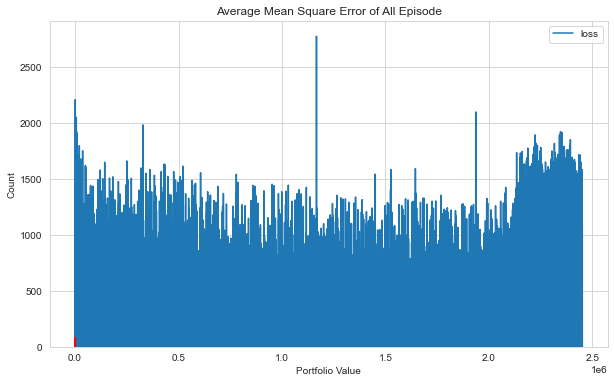

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

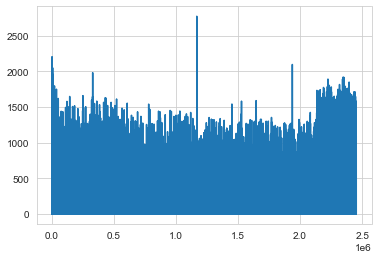

In [14]:
plt.plot(agent.model.losses)

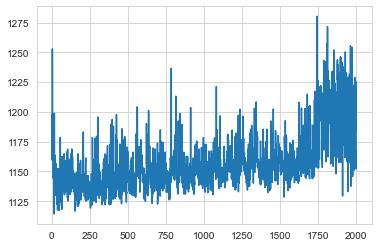

In [15]:
plt.plot(portfolio_value)

episode end value: 1133.91, duration: 0:00:00.105026
Sell: 396 times, Buy: 352 times


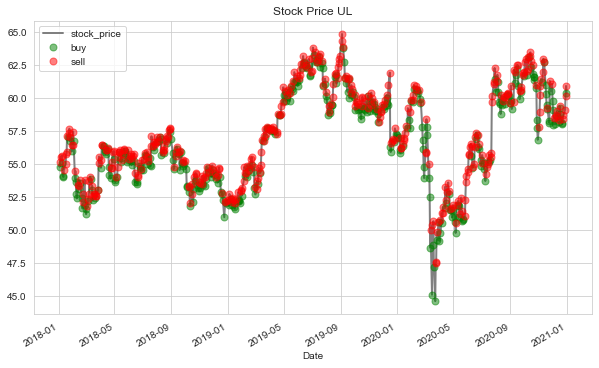

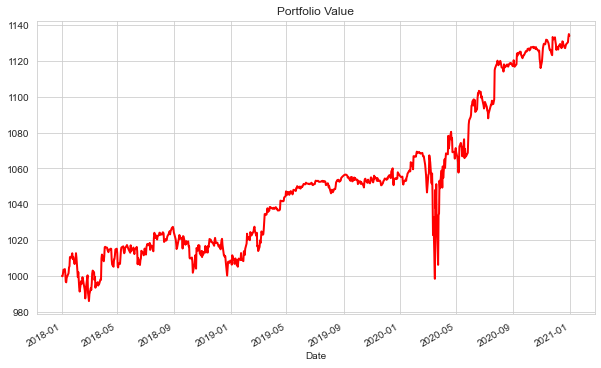

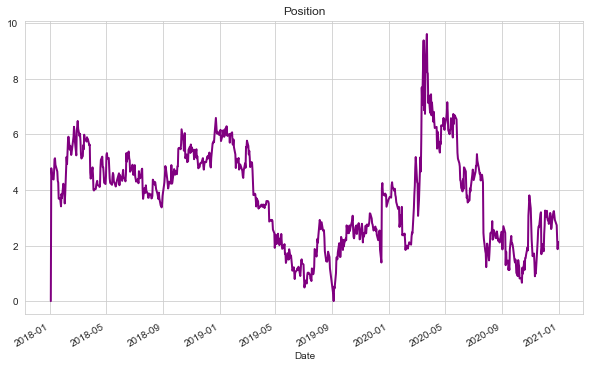

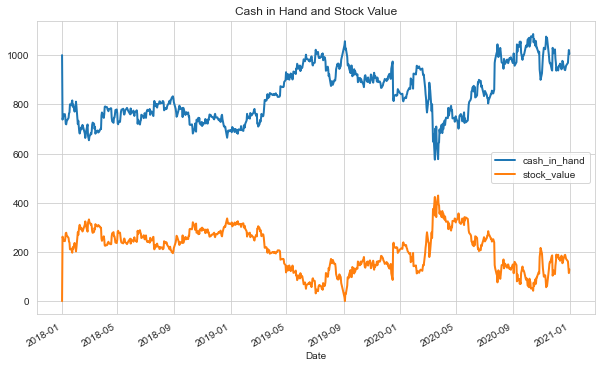

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: UL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.28 %
Volatility: 0.0633
shape ratio: 0.5018
Maximun drawdown: -6.63 %
Calmar ratio: 0.6457
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.24 %
Volatility (benchmark): 0.2334
shape ratio: 0.0918
Maximun drawdown: -31.17 %
Calmar ratio (benchmark): 0.1040


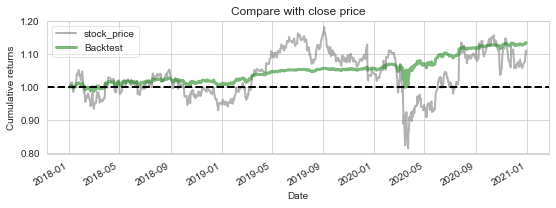

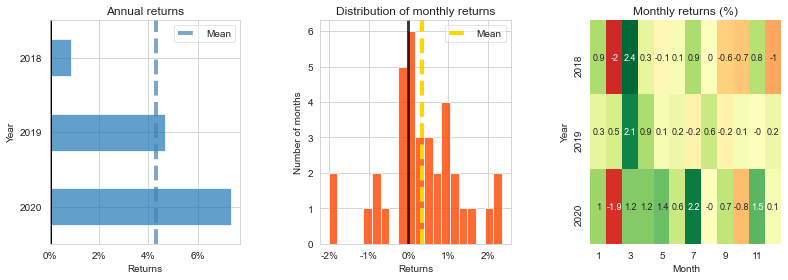

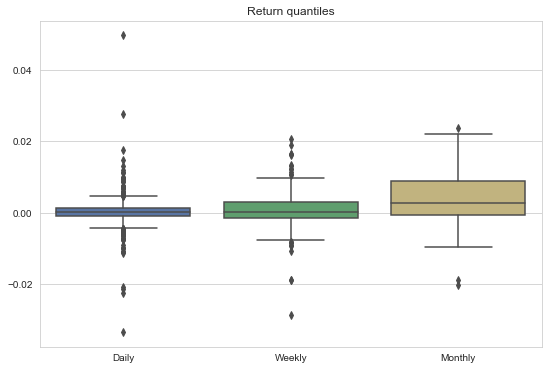

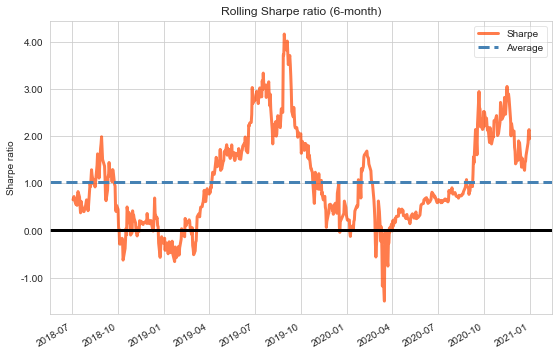

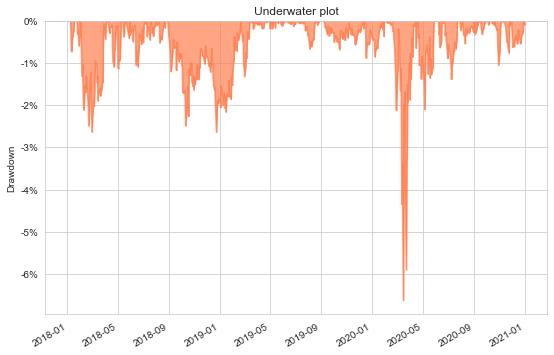

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')